<a href="https://colab.research.google.com/github/rodrigoldiniz/Scripts_Python/blob/master/CS_Visualizacao_Informacao_Python_Analise_Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nome:** Rodrigo Lopes Diniz

**RGM:** 22657126

**Instituição:** CRUZEIRO DO SUL - EAD

**Curso:** Superior de tecnologia em ciência de dados

**Link do dataset utilizado:** https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide

**Link do meu video de apresentação:** https://www.loom.com/share/b79e23a28526452ba2860af85feb0445

Importação dos módulos

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as p

Importando os dados

In [9]:
aqrv = 'https://opendata.ecdc.europa.eu/covid19/casedistribution/csv'
df = pd.read_csv(aqrv, encoding="utf-8")

Converter o data em tipo Data

In [11]:
df['dateRep'] = pd.to_datetime(df['dateRep'], format="%d/%m/%Y")
df.rename(columns={'cases_weekly': 'cases', 'deaths_weekly': 'deaths'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9577 entries, 0 to 9576
Data columns (total 10 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   dateRep                                          9577 non-null   datetime64[ns]
 1   year_week                                        9577 non-null   object        
 2   cases                                            9577 non-null   int64         
 3   deaths                                           9577 non-null   int64         
 4   countriesAndTerritories                          9577 non-null   object        
 5   geoId                                            9534 non-null   object        
 6   countryterritoryCode                             9556 non-null   object        
 7   popData2019                                      9556 non-null   float64       
 8   continentExp                          

Verificar os dados

In [12]:
df.head(10)

,dateRep,year_week,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,notification_rate_per_100000_population_14-days
0,2021-01-04,2020-53,902,60,Afghanistan,AF,AFG,38041757.0,Asia,7.61
1,2020-12-28,2020-52,1994,88,Afghanistan,AF,AFG,38041757.0,Asia,7.19
2,2020-12-21,2020-51,740,111,Afghanistan,AF,AFG,38041757.0,Asia,6.56
3,2020-12-14,2020-50,1757,71,Afghanistan,AF,AFG,38041757.0,Asia,9.01
4,2020-12-07,2020-49,1672,137,Afghanistan,AF,AFG,38041757.0,Asia,7.22
5,2020-11-30,2020-48,1073,68,Afghanistan,AF,AFG,38041757.0,Asia,6.42
6,2020-11-23,2020-47,1368,69,Afghanistan,AF,AFG,38041757.0,Asia,6.66
7,2020-11-16,2020-46,1164,61,Afghanistan,AF,AFG,38041757.0,Asia,4.65
8,2020-11-09,2020-45,606,24,Afghanistan,AF,AFG,38041757.0,Asia,3.70
9,2020-11-02,2020-44,800,27,Afghanistan,AF,AFG,38041757.0,Asia,3.77


In [13]:
df.dateRep.describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



count                    9577
unique                     53
top       2020-11-23 00:00:00
freq                      213
first     2020-01-06 00:00:00
last      2021-01-04 00:00:00
Name: dateRep, dtype: object

Acerta os dados para o gráfico de setores

In [ ]:
pie = df.groupby('continentExp')['cases', 'deaths'].sum().reset_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
pie.head()

,continentExp,cases,deaths
0,Africa,177209,4913
1,America,3206492,178273
2,Asia,1277558,33481
3,Europe,2035331,177908
4,Oceania,8716,131


**Gráfico 1** - Gráfico de setores sobre o total de casos e outro com o total de mortes por Covid-19 por continente

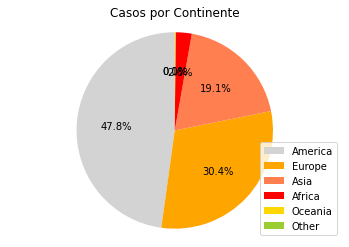

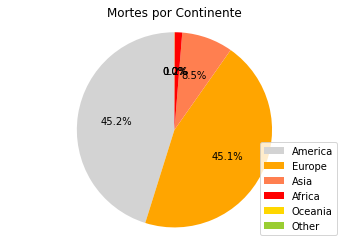

In [ ]:
labels = pie.sort_values(by=["cases"], ascending=False)["continentExp"]
casos = pie.sort_values(by=["cases"], ascending=False)["cases"]
mortes = pie.sort_values(by=["deaths"], ascending=False)["deaths"]
colors = [ 'lightgray', 'orange', 'coral', 'red','gold', 'yellowgreen', 'lightblue']

patches, texts, autotexts = plt.pie(casos, colors=colors, autopct='%1.1f%%',
startangle=90)
plt.legend(patches, labels, loc="lower right")
plt.title('Casos por Continente')
plt.axis('equal')
plt.show()

patches, texts, autotexts = plt.pie(mortes, colors=colors, autopct='%1.1f%%',
startangle=90)
plt.legend(patches, labels, loc="lower right")
plt.title('Mortes por Continente')
plt.axis('equal')
plt.show()


Preparação dos dados para o gráfico de linha

In [ ]:
line = df.groupby('dateRep')['cases', 'deaths'].sum().reset_index()
line.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,dateRep,cases,deaths
0,2019-12-31,27,0
1,2020-01-01,0,0
2,2020-01-02,0,0
3,2020-01-03,17,0
4,2020-01-04,0,0


**Gráfico 2** - Gráfico de linha sobre os Casos e mortes de Covid-19 por tempo no Mundo

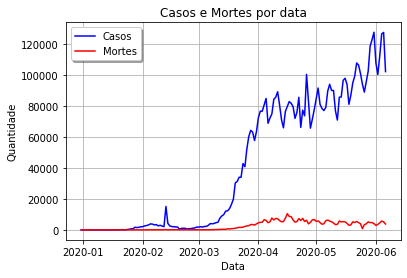

In [ ]:
plt.style.use("seaborn-pastel")
data = line.sort_values(by=["dateRep"], ascending=False)["dateRep"]
casos = line.sort_values(by=["dateRep"], ascending=False)["cases"]
mortes = line.sort_values(by=["dateRep"], ascending=False)["deaths"]

plt.xlabel('Data')
plt.ylabel('Quantidade')
plt.title('Casos e Mortes por data')
plt.plot(data, casos, label='Casos', color='blue')
plt.plot(data, mortes, label='Mortes', color='red')
plt.legend(loc='upper left', shadow=True, fancybox=True)
plt.grid(True)
plt.show()

Preparação dos dados para o gráfico choropleth

In [14]:
df_agrupado = df.groupby(['dateRep', 'countryterritoryCode'])['cases', 'deaths'].sum().reset_index()
world = df.groupby('countryterritoryCode')['cases', 'deaths'].sum().reset_index()
world = world.sort_values(by=["cases"], ascending=False)
world.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,countryterritoryCode,cases,deaths
198,USA,20640214,351590
91,IND,10340469,149649
27,BRA,7733746,196018
163,RUS,3260138,58988
67,FRA,2655728,65037


**Gráfico 3** - Gráfico de choropleth sobre os casos e mortes de Covid-19 no Mundo e o último gráfico de choropleth são os casos e mortes na linha do tempo, sendo que a data é interativa.

In [15]:
fig = go.Figure(data=go.Choropleth(
 locations=world['countryterritoryCode'],
 z = world['cases'].astype(int),
 locationmode = 'ISO-3',
 colorscale = 'Reds',
 colorbar_title = "Casos",
))
fig.update_layout(
 title_text = 'Casos de Covid no Mundo',
)
fig.show()

fig = go.Figure(data=go.Choropleth(
 locations=world['countryterritoryCode'],
 z = world['deaths'].astype(int),
 locationmode = 'ISO-3',
 colorscale = 'Reds',
 colorbar_title = "Mortes",
))
fig.update_layout(
 title_text = 'Mortes por Covid no Mundo',
)
fig.show()

fig = p.choropleth(df_agrupado,
                    locations='countryterritoryCode',
                    locationmode='ISO-3',
                    color=np.log(df_agrupado["cases"]),
                    hover_name='countryterritoryCode',
                    hover_data=["cases", "deaths"],
                    animation_frame=df_agrupado["dateRep"].dt.strftime('%d-%m-%Y'),
                    title='Casos ao longo do tempo',
                    color_continuous_scale=p.colors.sequential.Magenta)
fig.update_layout(autosize=False, width=1200, height=800)
fig.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning:

invalid value encountered in log



Preparação dos dados para o gráfico de Treemap

In [ ]:
pais = df.groupby(['countriesAndTerritories', 'continentExp'])['cases', 'deaths'].sum().reset_index()
pais = pais.sort_values(by=["cases"], ascending=False)
pais.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 201 to 5
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   countriesAndTerritories  210 non-null    object
 1   continentExp             210 non-null    object
 2   cases                    210 non-null    int64 
 3   deaths                   210 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 8.2+ KB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Pré-requisito para executar o gráfico de Treemap

In [ ]:
!pip install plotly==4.5.2

**Gráfico 4** - Gráfico de Treemap com os casos e outro com as mortes de Covid-19 por Continente e países

In [ ]:
fig = p.treemap(pais,path=(['continentExp', 'countriesAndTerritories']),values='cases', title='Número de Casos Confirmadas',
                 color_discrete_sequence = p.colors.qualitative.Dark2)
fig.data[0].textinfo = 'label+text+value'
fig.show()

fig = p.treemap(pais,path=(['continentExp', 'countriesAndTerritories']),values='deaths', title='Número de Mortes Confirmadas',
                 color_discrete_sequence = p.colors.qualitative.Dark2)
fig.data[0].textinfo = 'label+text+value'
fig.show()
